In [4]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
file_path = "DATA/SBQ_CSV.csv"
data = pd.read_csv(file_path, delimiter=",", quotechar='"', on_bad_lines='skip')

def plot_Basis_Set_bar(Basis_Sets_counts, context_label="Basis_Sets", bar_color="royalblue", max_y_text_pos=18):
    Basis_Sets, counts = zip(*Basis_Sets_counts)
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(Basis_Sets, counts, color=bar_color)

    for bar, count in zip(bars, counts):
        plt.text(bar.get_width() / 2,
                 bar.get_y() + bar.get_height() / 2,
                 str(count),
                 ha='center', va='center', fontsize=12, color='white')

    plt.text(max(counts) * 0.6, max_y_text_pos, context_label,
             fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

    plt.xlabel('Frequency')
    plt.ylabel('Basis Sets')
    plt.tight_layout()
    plt.show()

def plot_Basis_Set_wordcloud(Basis_Set_counter, title="WordCloud of Unified Basis_Sets"):
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(Basis_Set_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    #plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

Basis_Set_mapping = {}

def reverse_map_Basis_Set(Basis_Set, mapping):
    for main_Basis_Set, variations in mapping.items():
        if Basis_Set.lower() == main_Basis_Set.lower() or Basis_Set.lower() in variations or main_Basis_Set.lower() in Basis_Set.lower():
            return main_Basis_Set
    else:
        return Basis_Set

import pandas as pd
import matplotlib.pyplot as plt

def plot_comparison_bar(counts_a, counts_b, label_a="Year A", label_b="Year B",
                        bar_colors=("red", "purple"), title="Basis Set Frequency Comparison", n=10):
    combined_Basis_Sets = (counts_a + counts_b).most_common(n)
    Basis_Sets = [k for k, _ in combined_Basis_Sets]

    
    df = pd.DataFrame({
        label_a: [counts_a.get(k, 0) for k in Basis_Sets],
        label_b: [counts_b.get(k, 0) for k in Basis_Sets]
    }, index=Basis_Sets)

    ax = df.plot(kind='barh', figsize=(10, 6), color=bar_colors)

   
    for i, Basis_Set in enumerate(df.index):
        val_a = df.loc[Basis_Set, label_a]
        val_b = df.loc[Basis_Set, label_b]
        
        if val_a > 0:
            ax.text(val_a + 0.5, i - 0.15, str(val_a), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[0], edgecolor='none', boxstyle='round,pad=0.2'))
        
        if val_b > 0:
            ax.text(val_b + 0.5, i + 0.15, str(val_b), color='white',
                    fontsize=9, ha='left', va='center', fontweight='bold',
                    bbox=dict(facecolor=bar_colors[1], edgecolor='none', boxstyle='round,pad=0.2'))

    plt.xlabel("Frequency")
    plt.ylabel("Basis Set")
    #plt.title(title)
    plt.gca().invert_yaxis() 
    plt.tight_layout()
    plt.show()


In [6]:
BasisSet_mapping = {
    'sto-3g': ['sto-3g'],
    '3-21g': ['3-21g'],
    '6-21g': ['6-21g'],
    '4-31g': ['4-31g'],
    
    '6-31g**': ['6-31g**', '6-31g(d-p)', '6-31g(d-p)'],
    '6-31g*': ['6-31g*', '6-31g(d)'],
    '6-31g': ['6-31g'],
    '6-31+g**': ['6-31+g**', '6-31+g(d-p)', '6-31+g(d-p)'],
    '6-31+g*': ['6-31+g*', '6-31+g(d)'],
    '6-31+g': ['6-31+g'],
    
    '6-31++g**': ['6-31++g**', '6-31++g(d-p)'],
    '6-31++g*': ['6-31++g*', '6-31++g(d)'],
    '6-31++g': ['6-31++g'],
    
    '6-311g**': ['6-311g**', '6-311g(d-p)'],
    '6-311g*': ['6-311g*', '6-311g(d)'],
    '6-311+g**': ['6-311+g**', '6-311+g(d-p)'],
    '6-311+g*': ['6-311+g*', '6-311+g(d)'],
    '6-311+g(2d-p)':['6-311+g(2d-p)'],
    '6-311+g(2d-2p)':['6-311+g(2d-2p)'],
    
    '6-311+g': ['6-311+g'],
    '6-311++g**': ['6-311++g**', '6-311++g(d-p)'],
    '6-311++g*': ['6-311++g*', '6-311++g(d)'],
    '6-311++g': ['6-311++g'],
    
    '6-311g': ['6-311g'],
    
    'aug-cc-pvdz': ['aug-cc-pvdz'],
    'aug-cc-pvtz': ['aug-cc-pvtz'],
    'aug-cc-pvqz': ['aug-cc-pvqz'],
    'aug-cc-pv5z': ['aug-cc-pv5z'],

    'cc-pvdz': ['cc-pvdz'],
    'cc-pvtz': ['cc-pvtz'],
    'cc-pvqz': ['cc-pvqz'],
    'cc-pv5z': ['cc-pv5z'],
    
    'lanl2mb': ['lanl2mb'],
    'lanl2dz': ['lanl2dz'],
    'midi!': ['midi!'],
    
    'epr-iii': ['epr-iii'],
    'epr-ii': ['epr-ii'],
    'ugbs': ['ugbs'],
    'cep-4g': ['cep-4g'],
    'cep-31g': ['cep-31g'],
    'cep-121g': ['cep-121g'],
    'sdd': ['sdd'],
    'd95': ['d95'],
    'd95v': ['d95v'],
    'shc': ['shc'],

    'def2-svp': ['def2-svp'],
    'def2-tzvp': ['def2-tzvp'],
    'def2-qzvp': ['def2-qzvp'],

    'tzvp': ['tzvp'],
}



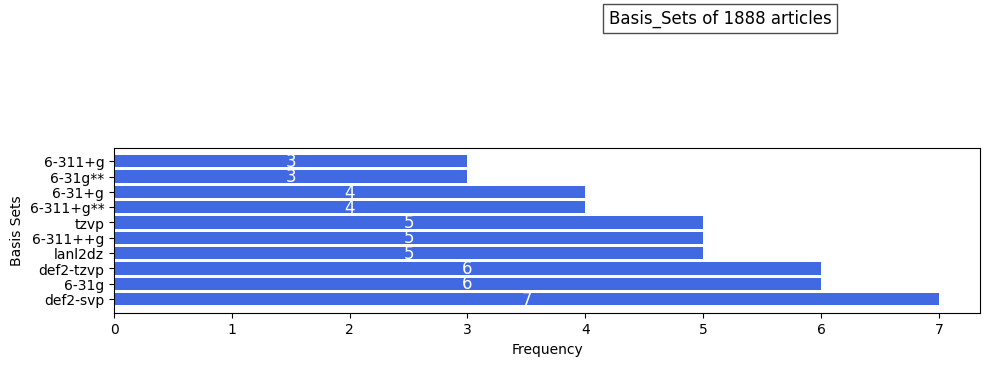

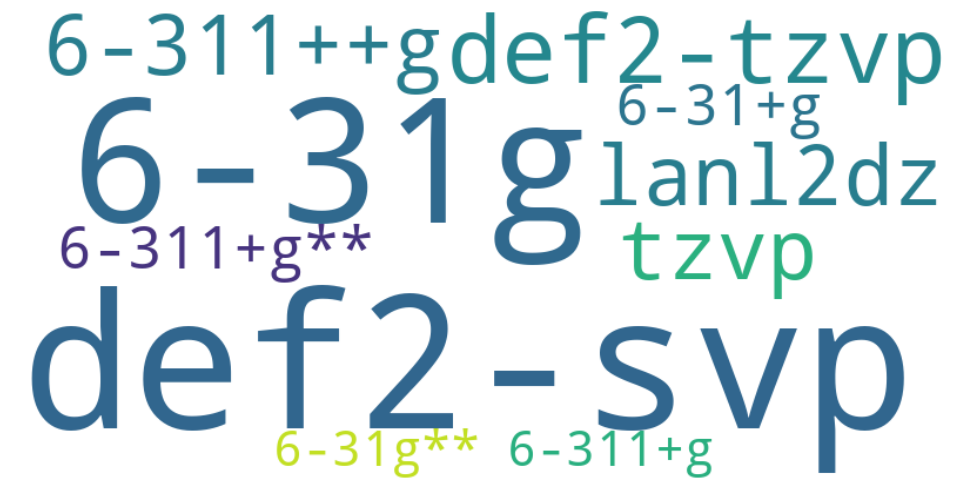

Counter({'def2-svp': 7, '6-31g': 6, 'def2-tzvp': 6, 'lanl2dz': 5, '6-311++g': 5, 'tzvp': 5, '6-311+g**': 4, '6-31+g': 4, '6-31g**': 3, '6-311+g': 3, '6-311g': 3, 'aug-cc-pvtz': 2, '6-31g*': 2, 'lacv3p**++ basis functions': 1, '6-31++g**': 1, 't1/2 = 0.693/a (half-life calculation)': 1, 'db-5 5%-phenyl-96%-dimethylsiloxane (1d)': 1, 'bpx50 50% phenyl-50% dimethylsiloxane (2d)': 1, 'acetate buffer (ph 5.0)': 1, 'charm99 force fields for dna and ligands structures': 1, 'tip3p as solvation model': 1, 'o': 1, 's': 1, 'h': 1, 'nmr experiments (1d and 2d)': 1, 'sante guideline': 1, 'alkyl lithium or lithium amides and tmpmgcl∙licl': 1, 'semiempirical pm6 method': 1, 'nb2o5 band gap energy 3.4 ev': 1, 'b3lyp': 1, '6-311++g**': 1, 'pdf-96-230849': 1, 'k2co3': 1, 'nahco3': 1, 'naoac': 1, 'nmr analysis': 1, 'cc-pvdz': 1, 'perdew-burke-ernzerhof exchange-correlation functional (pbe)': 1, 'kovats retention index': 1, 'injection of standards': 1, 'nist library comparison': 1, 'tzp (triple-zeta polar

In [7]:
Basis_Sets = data['Basis Set'].dropna()

all_Basis_Sets = (Basis_Sets.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

all_Basis_Sets = all_Basis_Sets[all_Basis_Sets != ""]
mapped_Basis_Sets = all_Basis_Sets.apply(lambda x: reverse_map_Basis_Set(x, BasisSet_mapping))
Basis_Set_counts_geral = Counter(mapped_Basis_Sets)
top_Basis_Sets = Basis_Set_counts_geral.most_common(10)
#print(top_Basis_Sets)
Basis_Sets, counts = zip(*top_Basis_Sets)

plot_Basis_Set_bar(top_Basis_Sets, context_label="Basis_Sets of 1888 articles")
plot_Basis_Set_wordcloud(dict(top_Basis_Sets))
print(Basis_Set_counts_geral)

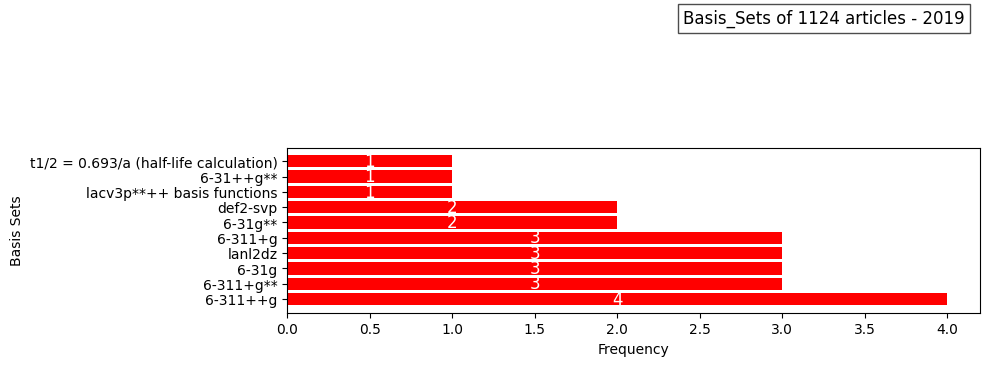

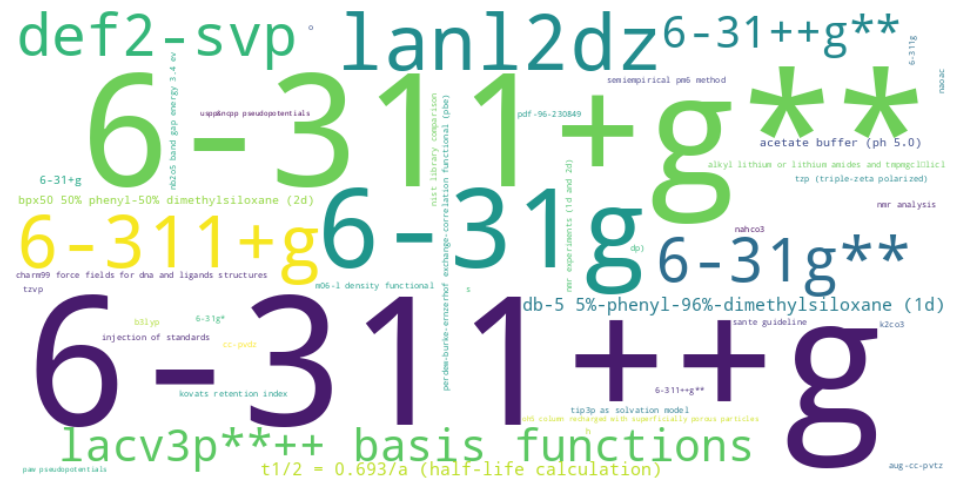

In [8]:
data_2019 = data[data['Year'] == 2019]

Basis_Sets = data_2019['Basis Set'].dropna()
all_Basis_Sets = (Basis_Sets.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))

all_Basis_Sets = all_Basis_Sets[all_Basis_Sets != ""]

mapped_Basis_Sets = all_Basis_Sets.apply(lambda x: reverse_map_Basis_Set(x, BasisSet_mapping))
Basis_Set_counts_2019 = Counter(mapped_Basis_Sets)
top_Basis_Sets = Basis_Set_counts_2019.most_common(10)
Basis_Sets, counts = zip(*top_Basis_Sets)

plot_Basis_Set_bar(top_Basis_Sets, context_label="Basis_Sets of 1124 articles - 2019", bar_color="red")
plot_Basis_Set_wordcloud(Basis_Set_counts_2019)


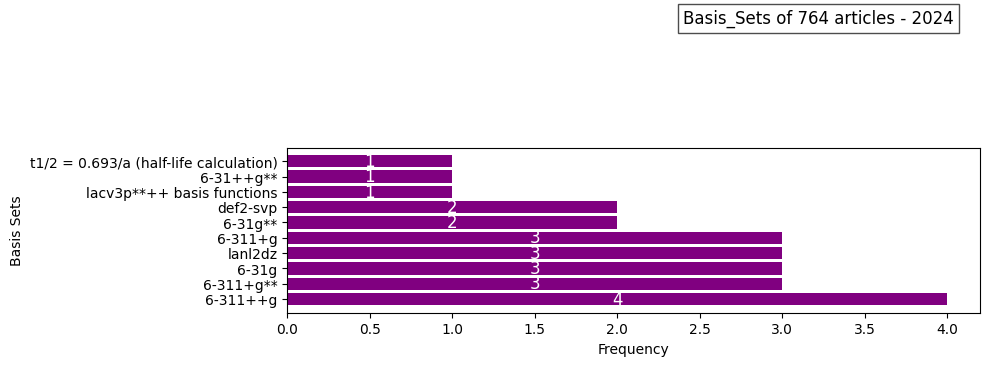

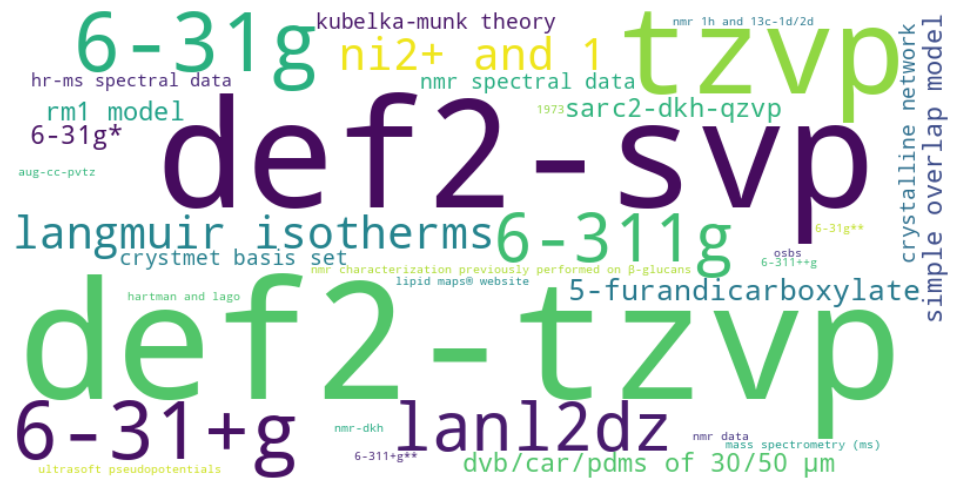

In [9]:
data_2019 = data[data['Year'] == 2024]

Basis_Sets = data_2019['Basis Set'].dropna()

all_Basis_Sets = (Basis_Sets.str.split(r'[;,]').explode().str.strip().str.lower().str.replace("'", ""))
all_Basis_Sets = all_Basis_Sets[all_Basis_Sets != ""]

mapped_Basis_Sets = all_Basis_Sets.apply(lambda x: reverse_map_Basis_Set(x, BasisSet_mapping))
Basis_Set_counts_2024 = Counter(mapped_Basis_Sets)
top_Basis_Sets = Basis_Set_counts_2019.most_common(10)
Basis_Sets, counts = zip(*top_Basis_Sets)

plot_Basis_Set_bar(top_Basis_Sets, context_label="Basis_Sets of 764 articles - 2024", bar_color="purple")
plot_Basis_Set_wordcloud(Basis_Set_counts_2024)

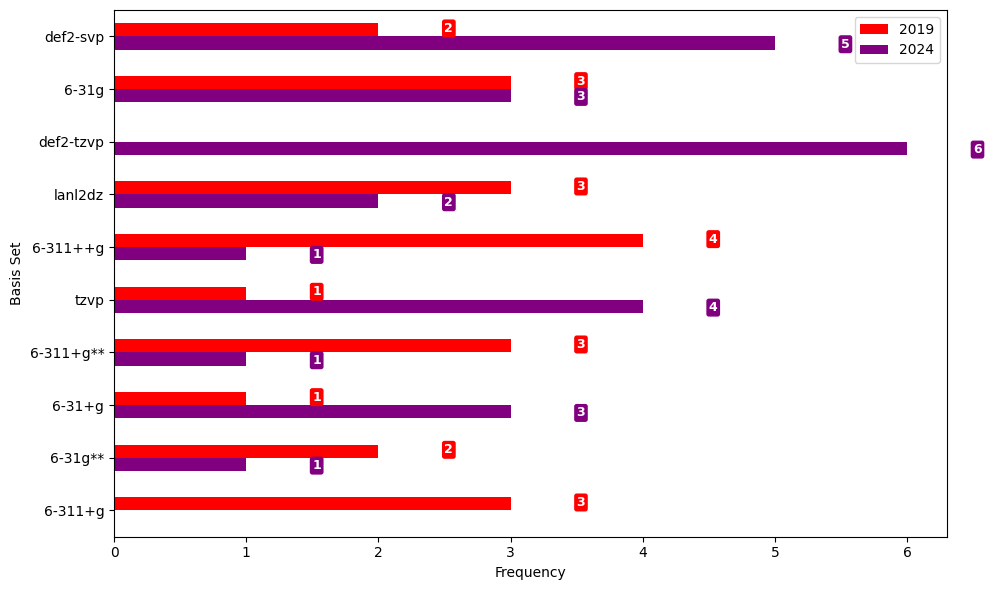

In [ ]:
plot_comparison_bar(
    counts_a=Basis_Set_counts_2019,
    counts_b=Basis_Set_counts_2024,
    label_a="2019",
    label_b="2024",
)